In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# CCTV 데이터 불러오기
df = pd.read_excel("cctv데이터.xlsx")  # 파일 경로 맞게 조정

# 위도/경도 컬럼명 맞추기
df = df[['WGS84위도', 'WGS84경도']].dropna()

# 서울 중심 좌표로 지도 생성
seoul_center = [37.5665, 126.9780]
m = folium.Map(location=seoul_center, zoom_start=11)

# 마커 클러스터
marker_cluster = MarkerCluster().add_to(m)

# CCTV 마커 추가
for _, row in df.iterrows():
    folium.Marker(location=[row['WGS84위도'], row['WGS84경도']]).add_to(marker_cluster)

# 지도 저장
m.save("seoul_cctv_map.html")


e:\Anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
# CCTV 데이터 불러오기
df1 = pd.read_csv("서울특별시_가로등 위치 정보_20221108.csv", encoding="cp949")  

# 위도/경도 컬럼명 맞추기
df1 = df1[['위도', '경도']].dropna()

# 서울 중심 좌표로 지도 생성
seoul_center = [37.5665, 126.9780]
m = folium.Map(location=seoul_center, zoom_start=11)

# 마커 클러스터
marker_cluster = MarkerCluster().add_to(m)

# CCTV 마커 추가
for _, row in df1.iterrows():
    folium.Marker(location=[row['위도'], row['경도']]).add_to(marker_cluster)

# 지도 저장
m.save("seoul_map.html")


In [3]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# CCTV 데이터 불러오기
df2 = pd.read_csv("전국보안등정보표준데이터.csv", encoding="cp949")
df3 = pd.read_csv("서울특별시_광진구_보안등정보_20241024.csv", encoding="utf-8-sig")

# "소재지지번주소" 열에서 "서울"이 포함된 행만 필터링
df_seoul1 = df2[df2['소재지지번주소'].str.contains("서울", na=False)]

# 두 데이터프레임 아래로 합치기
df_combined12 = pd.concat([df3, df_seoul1], ignore_index=True)

# 위도/경도 컬럼명 맞추기 및 결측치 제거
df_combined1 = df_combined12[['위도', '경도']].dropna()

# 서울 중심 좌표로 지도 생성
seoul_center = [37.5665, 126.9780]
m = folium.Map(location=seoul_center, zoom_start=11)

# 마커 클러스터
marker_cluster = MarkerCluster().add_to(m)

# CCTV 마커 추가
for _, row in df_combined1.iterrows():
    folium.Marker(location=[row['위도'], row['경도']]).add_to(marker_cluster)

# 지도 저장
m.save("seoul_map1.html")
print("Map saved as 'seoul_map1.html'")


Map saved as 'seoul_map1.html'


In [4]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# CCTV 데이터 불러오기
df4 = pd.read_csv("전국스마트가로등표준데이터.csv", encoding="cp949")
df5 = pd.read_csv("서울특별시_광진구_스마트가로등_20240328.csv", encoding="euc-kr")



# "소재지지번주소" 열에서 "서울"이 포함된 행만 필터링
df_seoul2 = df4[df4['소재지지번주소'].str.contains("서울", na=False)]

# 두 데이터프레임 아래로 합치기
df_combined3 = pd.concat([df5, df_seoul2], ignore_index=True)

# 위도/경도 컬럼명 맞추기 및 결측치 제거
df_combined = df_combined3[['위도', '경도']].dropna()

# 서울 중심 좌표로 지도 생성
seoul_center = [37.5665, 126.9780]
m = folium.Map(location=seoul_center, zoom_start=11)

# 마커 클러스터
marker_cluster = MarkerCluster().add_to(m)

# CCTV 마커 추가
for _, row in df_combined.iterrows():
    folium.Marker(location=[row['위도'], row['경도']]).add_to(marker_cluster)

# 지도 저장
m.save("seoul_map2.html")
print("Map saved as 'seoul_map2.html'")


Map saved as 'seoul_map2.html'


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import warnings

warnings.filterwarnings("ignore", message="Workbook contains no default style, apply openpyxl's default")

load_dotenv()

# 환경 변수 불러오기
file2023_path = os.getenv('FILE2023_PATH')
file_path22_21 = os.getenv('FILE_PATH22_21')
file_path19_20 = os.getenv('FILE_PATH19_20')
file_path17_18 = os.getenv('FILE_PATH17_18')


# 데이터 불러오기
cctv = pd.read_excel("cctv데이터.xlsx")
crime1 = pd.read_excel(file_path17_18, skiprows=1, header=[0, 1], engine='openpyxl')
crime2 = pd.read_excel(file_path19_20, skiprows=1, header=[0, 1], engine='openpyxl')
crime3 = pd.read_excel(file_path22_21, skiprows=1, header=[0, 1], engine='openpyxl')
crime4 = pd.read_excel(file2023_path, skiprows=1, header=[0, 1], engine='openpyxl')


In [6]:
# 범죄 데이터 통합
crime_all = pd.concat([crime1, crime2, crime3, crime4])

df_filtered = crime1[crime1[('범죄별(1)', '범죄별(1)')] == '형법범']

seoul = [i for i in df_filtered if "서울" in i[0]]



In [7]:
# 열들 추출
crime_data = df_filtered[seoul].copy() # 범죄_서울 구 추출
gu_list=  [i[1]+ "구" for i in df_filtered if "서울" in i[0]] # 서울 구만 추출
monthly_crime_totals = crime_data.values.flatten().tolist() # 범죄 구 별 범죄 합

crime_summary_df = pd.DataFrame({
    '자치구': gu_list,
    '범죄발생합계': monthly_crime_totals
})
print(crime_summary_df )

       자치구  범죄발생합계
0      종로구    1648
1      중구구    1839
2      용산구    1385
3      성동구    1074
4      광진구    2178
5     동대문구    1554
6      중랑구    1536
7      성북구    1347
8      강북구    1014
9      도봉구     634
10     노원구    1540
11     은평구    1388
12    서대문구    1229
13     마포구    2097
14     양천구    1591
15     강서구    1887
16     구로구    1732
17     금천구     988
18    영등포구    2311
19     동작구    1230
20     관악구    2134
21     서초구    1821
22     강남구    3144
23     송파구    2279
24     강동구    1648
25   종로.1구    1488
26   중구.1구    1858
27   용산.1구    1133
28   성동.1구     998
29   광진.1구    1767
30  동대문.1구    1453
31   중랑.1구    1527
32   성북.1구    1162
33   강북.1구    1116
34   도봉.1구     785
35   노원.1구    1414
36   은평.1구    1275
37  서대문.1구    1061
38   마포.1구    2023
39   양천.1구    1384
40   강서.1구    1729
41   구로.1구    1724
42   금천.1구    1020
43  영등포.1구    2287
44   동작.1구    1153
45   관악.1구    2171
46   서초.1구    1866
47   강남.1구    3022
48   송파.1구    2356
49   강동.1구    1516


In [8]:
# CCTV 데이터에서 자치구 추출
cctv['자치구'] = cctv['관리기관명'].str.extract(r'(\S+구)')
cctv_by_gu = cctv['자치구'].value_counts().reset_index()
cctv_by_gu.columns = ['자치구', 'CCTV_수']
print(cctv_by_gu)

     자치구  CCTV_수
0    서초구    5428
1    양천구    4795
2   영등포구    4697
3    송파구    4669
4    강북구    3584
5    노원구    3111
6    강남구    2578
7    구로구    2060
8    관악구    2040
9    용산구    1930
10   성북구    1832
11   강서구    1792
12   은평구    1789
13   강동구    1461
14   중랑구    1357
15   마포구    1328
16   성동구    1314
17   광진구    1185
18  동대문구    1156
19    중구    1078
20  서대문구    1061
21   종로구     935
22   금천구     935
23   동작구     890


In [9]:

# # Try reading the CSV files again with 'cp949' encoding (commonly used for Korean Windows CSVs)
# df_lights = pd.read_csv(file1, encoding='cp949')
# df_smart_lights = pd.read_csv(file2, encoding='cp949')

df_seoul_lights = df_combined12[df_combined12['소재지지번주소'].str.contains('서울특별시', na=False)]
# 주소에서 구 이름만 추출 ('서울특별시 OO구')
df_seoul_lights['구이름'] = df_seoul_lights['소재지지번주소'].str.extract(r'서울특별시\s*([가-힣]+구)')

# 구 이름별 설치개수 합산
gu_aggregated = df_seoul_lights.groupby('구이름')['설치개수'].sum().reset_index()


for i in gu_list:
    if i in df_seoul_lights:
        count +=0

# 구 이름별 개수 세기
gu_counts = df_combined3['시군구명'].value_counts().reset_index()
gu_counts.columns = ['구이름', '개수']
# # 구 이름별 개수 세기
# gu_counts = seoul_smart_lights['소재지지번주소'].value_counts().reset_index()
# gu_counts.columns = ['구이름', '개수']
# 두 데이터프레임 준비 (예시: df1 = 스마트가로등, df2 = 보안등)
df1 = gu_counts          # 구이름, 개수
df2 = gu_aggregated      # 구이름, 설치개수

In [10]:
merged = pd.merge(gu_counts, gu_aggregated, on='구이름', how='outer')
merged = merged.fillna(0)
merged['총합'] = merged['개수'] + merged['설치개수']
merged['총합'] = merged['총합'].astype(int)

# 총합과 구이름만 추출
result = merged[['구이름', '총합']]
result_renamed = result.rename(columns={'구이름': '자치구'})

print(result_renamed)

     자치구    총합
0    강남구   153
1    강서구  1203
2    관악구    57
3    광진구  9596
4    구로구    45
5    금천구     9
6    동작구    55
7   서대문구     4
8    서초구  7839
9    송파구    64
10   양천구    11
11   용산구     5
12   인제군     1
13    중구    12
14   중랑구   198


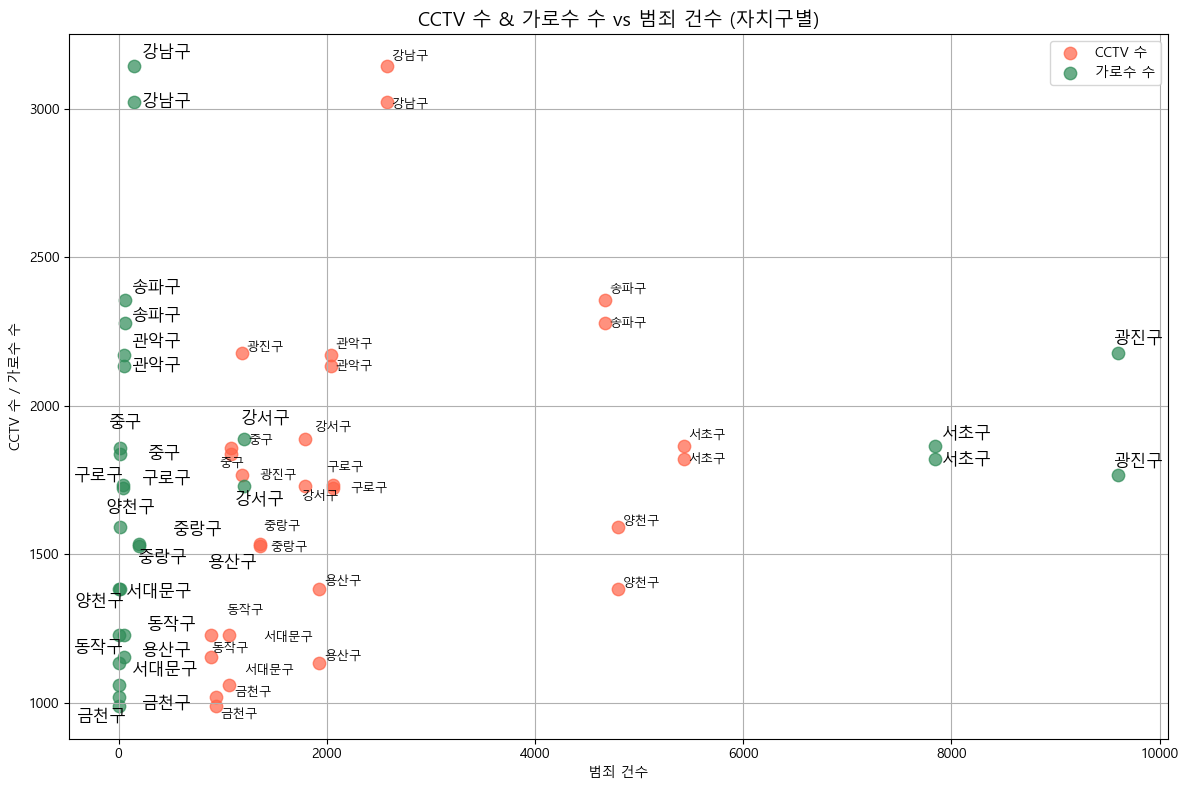

In [39]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import warnings

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")

# 자치구 정제
crime_summary_df['자치구'] = crime_summary_df['자치구'].str.replace(r'\.1구$', '구', regex=True)
crime_summary_df['자치구'] = crime_summary_df['자치구'].str.replace(r'구구$', '구', regex=True)

# 병합 (보안등+스마트등, CCTV, 범죄, 가로수)
df = pd.merge(result_renamed, cctv_by_gu, on='자치구')
df = pd.merge(df, crime_summary_df, on='자치구')

# 시각화
plt.figure(figsize=(12, 8))

# 1. CCTV 수 vs 범죄 건수
plt.scatter(df['CCTV_수'], df['범죄발생합계'], color='tomato', label='CCTV 수', s=80, alpha=0.7)

# 2. 가로수 수 vs 범죄 건수
plt.scatter(df['총합'], df['범죄발생합계'], color='seagreen', label='가로수 수', s=80, alpha=0.7)

# 라벨은 CCTV 쪽 기준으로만 붙임 (원하면 둘 다 가능)
texts = []
for i in range(len(df)):
    texts.append(plt.text(df['CCTV_수'][i], df['범죄발생합계'][i], df['자치구'][i], fontsize=9))
    texts.append(plt.text(df['총합'][i], df['범죄발생합계'][i], df['자치구'][i], fontsize=12))

adjust_text(texts)
plt.title('CCTV 수 & 가로수 수 vs 범죄 건수 (자치구별)', fontsize=14)
plt.xlabel('범죄 건수')
plt.ylabel('CCTV 수 / 가로수 수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
